In [191]:
import PoisDenoiser

import torch as th
import numpy as np
from time import time, sleep
from PoisDenoiser.dataset_loader import BSDS500
from PoisDenoiser.utils import show_images as show
from PoisDenoiser.utils import psnr


import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

import wavelet_transform as wt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


119082_1_maxval=1dot5
psnr : 5.892618179321289


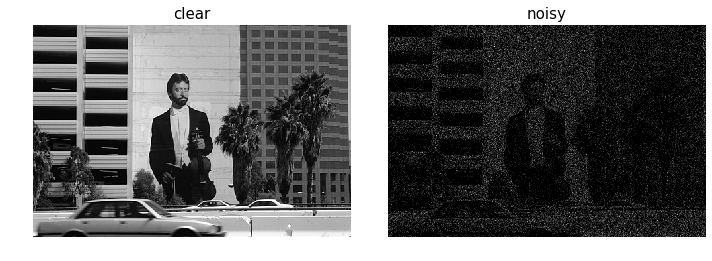

In [198]:
img_ind = 10
path2dataset = './DATASETS/BSDS500/BSDS500_validation_MAXVALs_01_2/'
BSDSval = BSDS500(path2dataset+'val/', get_name=True)
    
clear, noisy, name = BSDSval[img_ind]

print(name)
images = [clear, noisy]
titles = ['clear', 'noisy']
show(images, titles)
print('psnr : {}'.format(PoisDenoiser.utils.psnr(clear, noisy)))

# clear = clear[0]
# noisy = noisy[0]

In [208]:
slice_ = (slice(0,1),
          slice(50, 200),
          slice(150,300))
clear = clear[slice_]
noisy = noisy[slice_]

In [187]:
WT = wt.WaveletTransform('haar', 8, size=256)
psnrs_noisy, psnrs_clear = [], []

wt_noisy = WT.as_vector(WT.W(noisy))
masked = WT.as_vector(WT.masked_coefs(WT.W(noisy)))
epss = list(np.linspace(0.5, 10., 50))
for eps in epss:
    thresh = masked*(np.abs(masked)>eps)
    rec = WT.as_coefs(thresh)
    rec[0] = WT.approx_coefs
    inv = WT.W_inv(rec)
    
#     psnrs_noisy.append(psnr(th.Tensor(inv), th.Tensor(noisy)).numpy())
    psnrs_clear.append(psnr(th.Tensor(inv), th.Tensor(clear)).numpy())
    

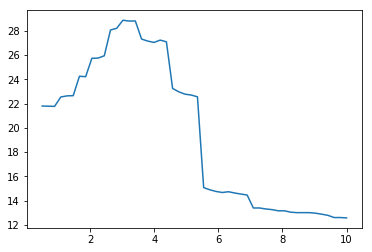

In [188]:
# plt.plot(epss, psnrs_noisy)
plt.plot(epss, psnrs_clear)